##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Treine sua primeira rede neural: classificação básica

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Veja em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Execute em Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Veja código fonte em GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixe o notebook</a>
  </td>
</table>

Note: A nossa comunidade TensorFlow traduziu estes documentos. Como as traduções da comunidade são *o melhor esforço*, não há garantias de que sejam uma reflexão exata e atualizada da [documentação oficial em Inglês](https://www.tensorflow.org/?hl=en). Se tem alguma sugestão para melhorar esta tradução, por favor envie um pull request para o repositório do GitHub [tensorflow/docs](https://github.com/tensorflow/docs). Para se voluntariar para escrever ou rever as traduções da comunidade, contacte a [lista docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras), uma API alto-nível para construir e treinar modelos no TensorFlow.

In [1]:
#remover warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores de pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [5]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [6]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [8]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [9]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

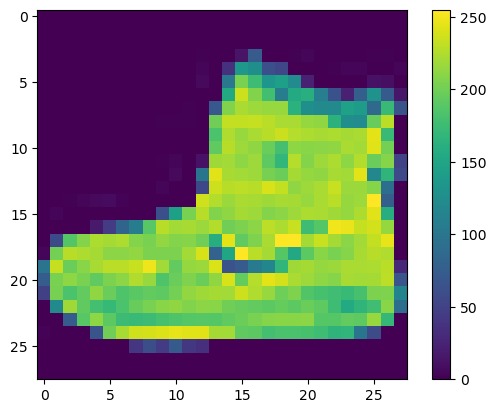

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

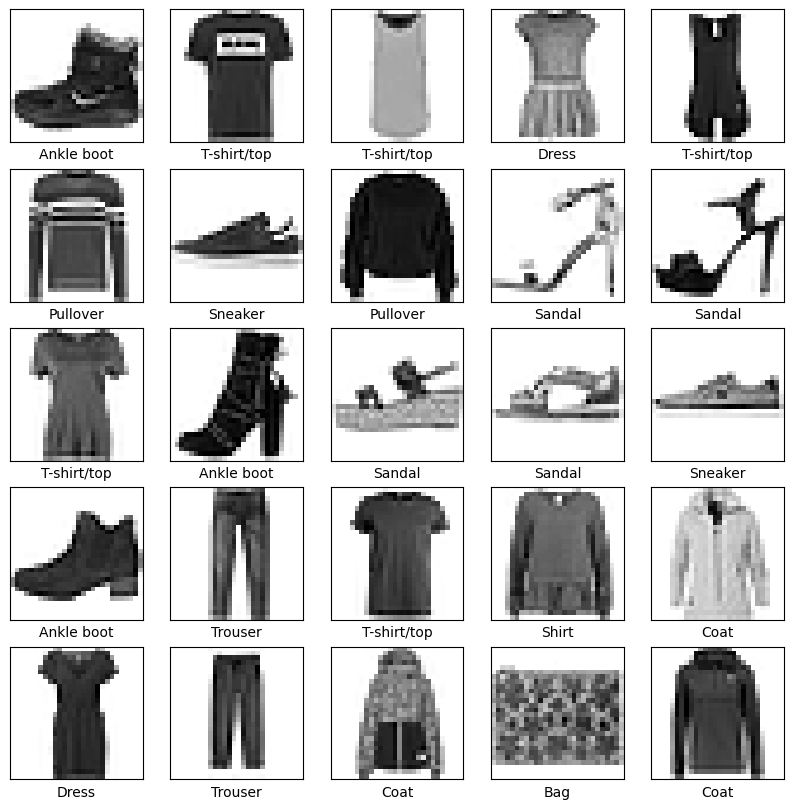

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste em encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camada é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para a direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4936 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3732 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3350 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3107 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2928 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2801 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2671 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2566 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2453 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3453 - accuracy: 0.8763 - 2s/epoch - 5ms/step

Test accuracy: 0.8762999773025513


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


Aqui, o modelo previu que a *label* de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [18]:
predictions[0]

array([2.3694948e-04, 1.0940665e-07, 4.8660894e-08, 2.8494453e-09,
       2.6393570e-06, 2.2840013e-03, 2.2378047e-06, 1.9390186e-02,
       4.0553747e-05, 9.7804332e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [19]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [20]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

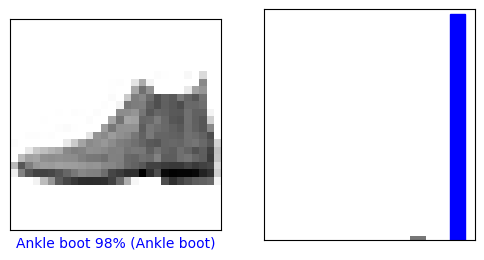

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

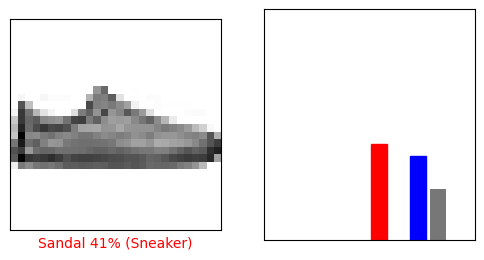

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

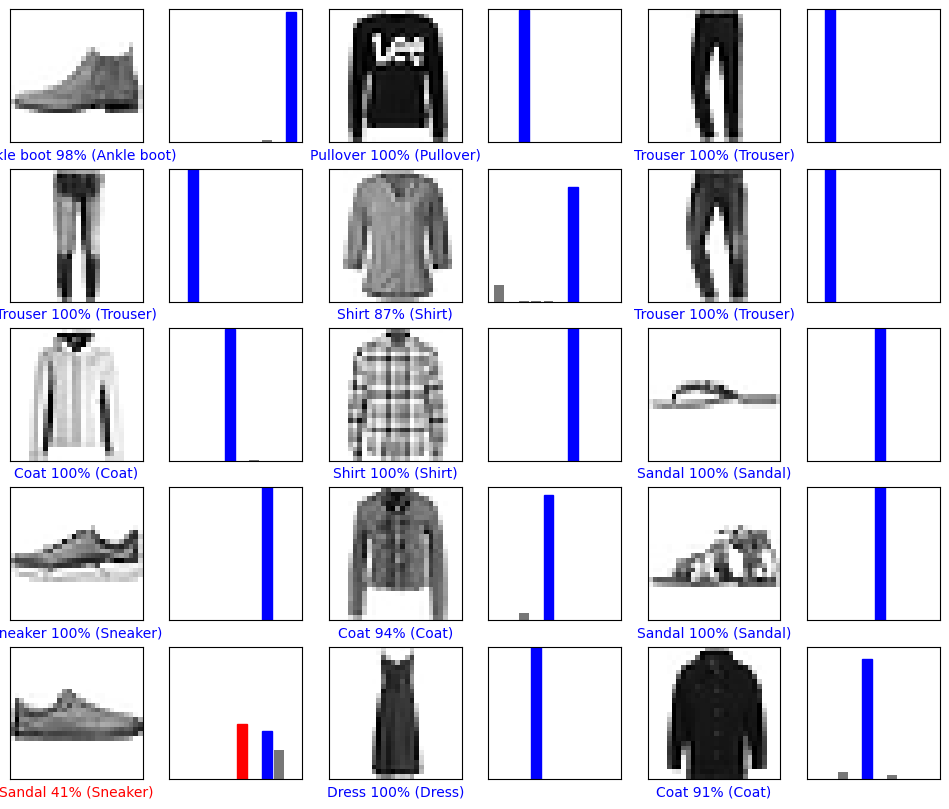

In [24]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use o modelo treinado para fazer a predição de uma única imagem.

In [25]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em um *batch*, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [26]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [27]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 40ms/step
[[2.3694900e-04 1.0940684e-07 4.8660887e-08 2.8494396e-09 2.6393466e-06
  2.2839999e-03 2.2378001e-06 1.9390194e-02 4.0553703e-05 9.7804320e-01]]


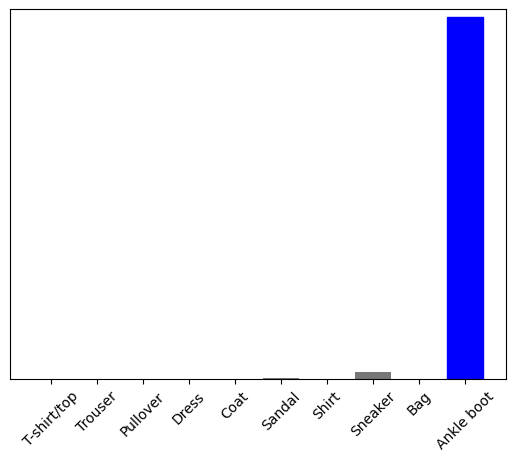

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas — uma lista para cada imagem em um *batch* de dados. Pegue a predição de nossa (única) imagem no *batch*:

In [29]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.

## Exercícios:

### 1) Repita as análises acima, porém utilizando as train/dev/test splits e plotando as curvas de treinamento (train/ val)
ps: em dúvida veja colab da aula de terça: https://colab.research.google.com/drive/10AtdPGFZeZukNEJDG9ab2kJ_ZObQ5Uvg

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Dividindo os dados de treinamento em treinamento e validação
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

test_images.shape, val_images.shape, test_labels.shape, val_labels.shape

((5000, 28, 28), (5000, 28, 28), (5000,), (5000,))

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5036 - accuracy: 0.8221 - val_loss: 0.4227 - val_accuracy: 0.8472
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3746 - accuracy: 0.8644 - val_loss: 0.3812 - val_accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3360 - accuracy: 0.8780 - val_loss: 0.3939 - val_accuracy: 0.8574
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3112 - accuracy: 0.8860 - val_loss: 0.3758 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2948 - accuracy: 0.8911 - val_loss: 0.3528 - val_accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2807 - accuracy: 0.8949 - val_loss: 0.3581 - val_accuracy: 0.8652
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2691 - accuracy: 0.9000 - val_loss: 0.3276 - val_ac

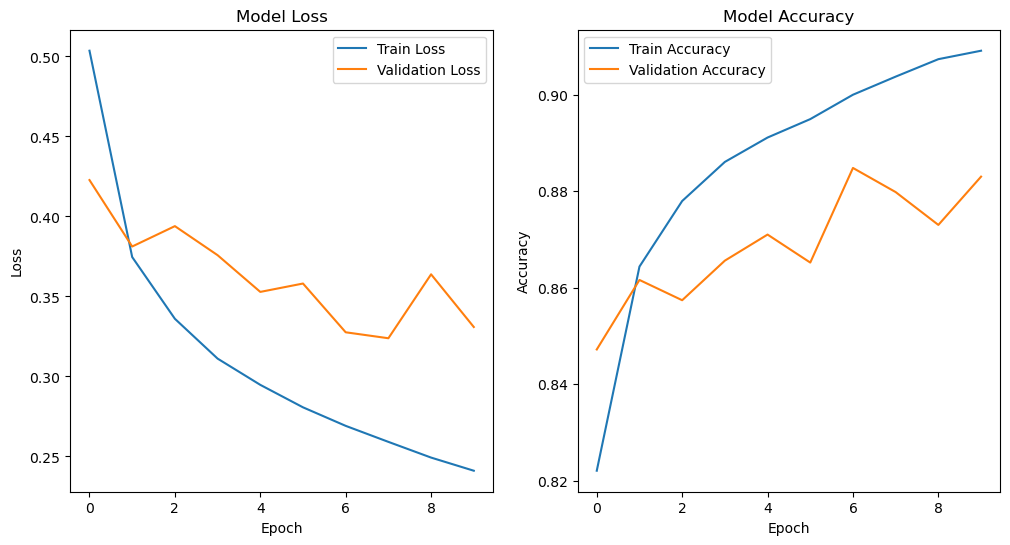

In [35]:
import matplotlib.pyplot as plt

# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

2) Realize experimentos realizando hyperparameter tuning com a mesma abrangência do exercício 1. Algumas dicas abaixo:
* learning rate
* qde layers
* num de unidades em cada layer
* batch size
* métodos de regularização: L2, early stopping, dropout...
* etc
* escreva em comentários e markdowns para guiar o leitor com seus experimentos - dica PEP8 styleguides: https://peps.python.org/pep-0008/

#### Etapa 1: Ajuste da Learning Rate

O otimizador Adam é conhecido por ser bastante robusto, mas ajustar sua taxa de aprendizado pode, às vezes, resultar em melhorias no desempenho do modelo. Vamos experimentar algumas taxas de aprendizado diferentes para ver como elas impactam o treinamento e o desempenho de validação do modelo.

Para fins de demonstração, consideraremos as seguintes taxas de aprendizado: 0.1, 0.01, 0.001 e 0.0001.

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.0414 - accuracy: 0.2913 - val_loss: 2.0183 - val_accuracy: 0.2018
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0255 - accuracy: 0.2121 - val_loss: 2.0691 - val_accuracy: 0.1862
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0880 - accuracy: 0.1821 - val_loss: 2.0622 - val_accuracy: 0.1890
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0836 - accuracy: 0.1833 - val_loss: 2.0724 - val_accuracy: 0.1782
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.0670 - accuracy: 0.1844 - val_loss: 2.0849 - val_accuracy: 0.1816
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0998 - accuracy: 0.1853 - val_loss: 2.0954 - val_accuracy: 0.1820
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0696 - accuracy: 0.1864 - val_loss: 2.1020 - val_accuracy:

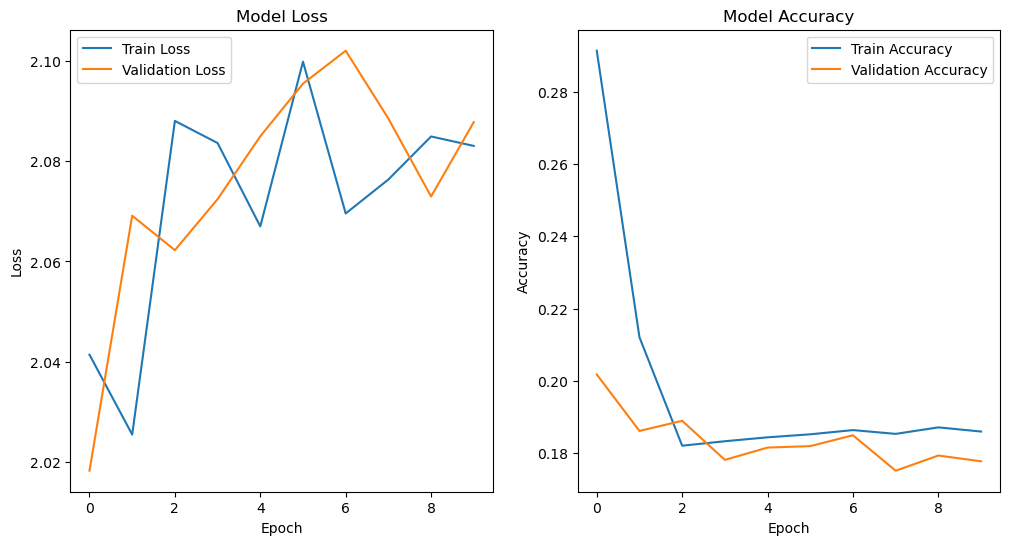

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5230 - accuracy: 0.8139 - val_loss: 0.5371 - val_accuracy: 0.8088
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4392 - accuracy: 0.8422 - val_loss: 0.4416 - val_accuracy: 0.8432
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4156 - accuracy: 0.8525 - val_loss: 0.4373 - val_accuracy: 0.8424
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4053 - accuracy: 0.8566 - val_loss: 0.4346 - val_accuracy: 0.8392
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3952 - accuracy: 0.8591 - val_loss: 0.4507 - val_accuracy: 0.8562
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3843 - accuracy: 0.8633 - val_loss: 0.4300 - val_accuracy: 0.8504
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3805 - accuracy: 0.8654 - val_loss: 0.4117 - val_accuracy

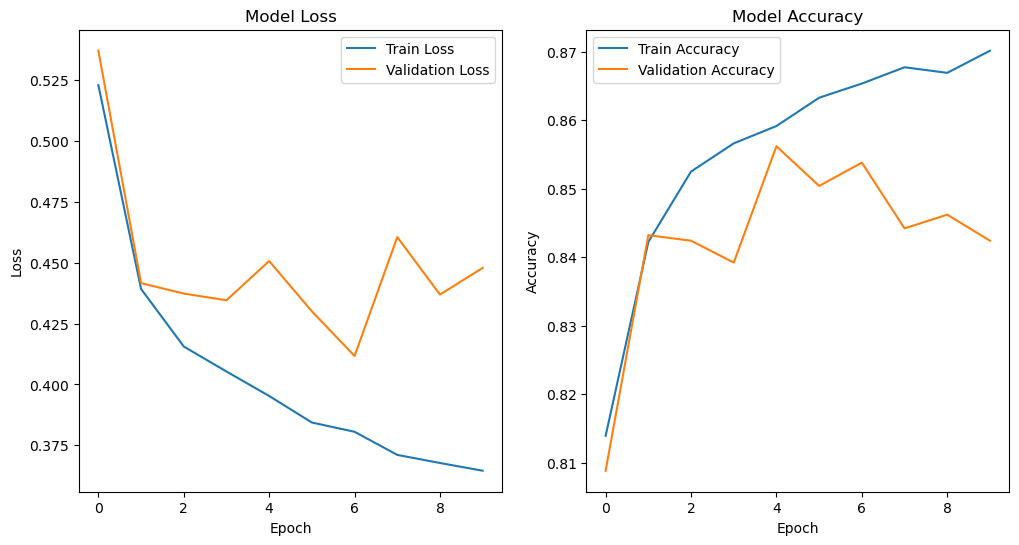

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5010 - accuracy: 0.8243 - val_loss: 0.4271 - val_accuracy: 0.8416
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3796 - accuracy: 0.8633 - val_loss: 0.4014 - val_accuracy: 0.8552
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8770 - val_loss: 0.3566 - val_accuracy: 0.8718
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3139 - accuracy: 0.8854 - val_loss: 0.3482 - val_accuracy: 0.8698
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2971 - accuracy: 0.8906 - val_loss: 0.3587 - val_accuracy: 0.8716
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2824 - accuracy: 0.8957 - val_loss: 0.3274 - val_accuracy: 0.8772
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2692 - accuracy: 0.8996 - val_loss: 0.3458 - val_accur

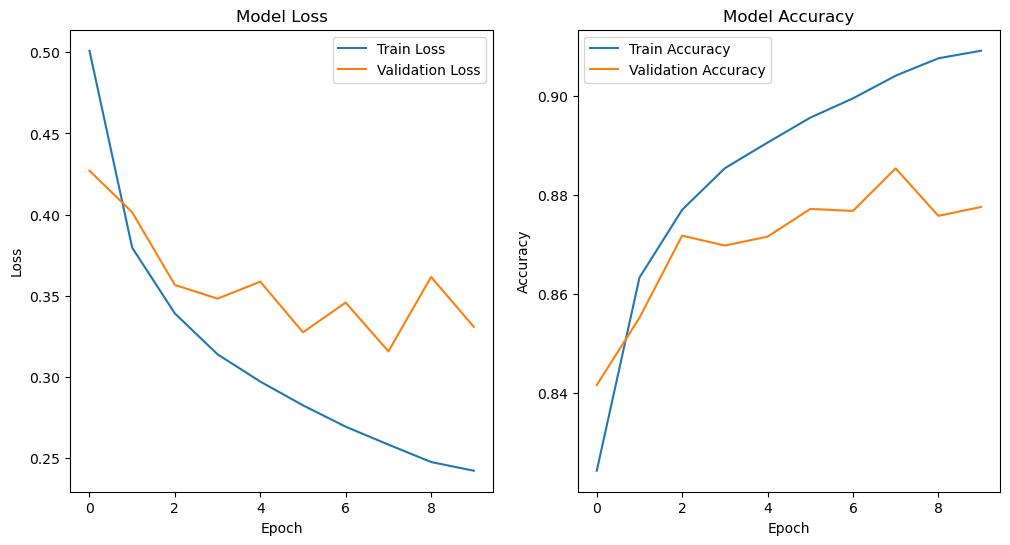

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7242 - accuracy: 0.7664 - val_loss: 0.5375 - val_accuracy: 0.8190
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4795 - accuracy: 0.8378 - val_loss: 0.4750 - val_accuracy: 0.8378
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4363 - accuracy: 0.8515 - val_loss: 0.4497 - val_accuracy: 0.8442
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4113 - accuracy: 0.8588 - val_loss: 0.4296 - val_accuracy: 0.8494
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3945 - accuracy: 0.8647 - val_loss: 0.4157 - val_accuracy: 0.8528
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3810 - accuracy: 0.8687 - val_loss: 0.4042 - val_accuracy: 0.8588
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3699 - accuracy: 0.8708 - val_loss: 0.4048 - val_accuracy

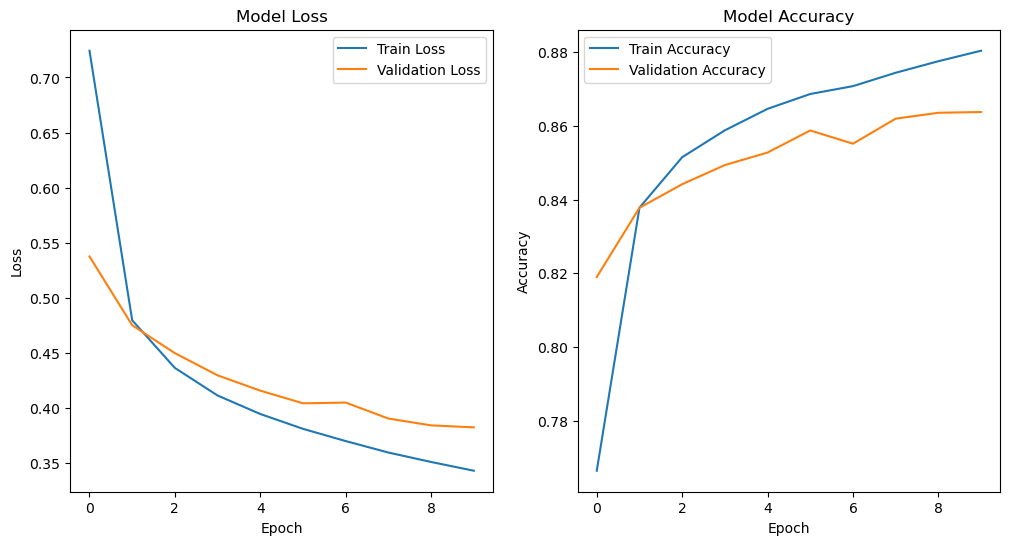

In [37]:
taxas_aprendizado = [0.1, 0.01, 0.001, 0.0001]

for taxa in taxas_aprendizado:
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    otimizador = keras.optimizers.Adam(learning_rate=taxa)
    
    model.compile(optimizer=otimizador,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))
    
    # Extract training and validation history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create subplots for loss and accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation loss values
    ax1.plot(loss, label='Train Loss')
    ax1.plot(val_loss, label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot training and validation accuracy values
    ax2.plot(accuracy, label='Train Accuracy')
    ax2.plot(val_accuracy, label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()   


1. **Taxa de aprendizado: 0.1**
   - O modelo não está convergindo bem. O valor da perda (loss) e a acurácia não estão melhorando consistentemente ao longo das épocas. Isso sugere que a taxa de aprendizado pode ser alta demais, fazendo com que o modelo oscile em torno do mínimo da função de perda ou até mesmo se afaste dele.

2. **Taxa de aprendizado: 0.01**
   - O modelo está convergindo de maneira mais estável do que o anterior. A acurácia de treinamento e validação está aumentando, e o valor da perda está diminuindo. Entretanto, há sinais de que o modelo pode estar começando a sofrer de overfitting, pois a perda de validação começa a aumentar nas últimas épocas enquanto a perda de treinamento continua a diminuir.

3. **Taxa de aprendizado: 0.001**
   - Esta parece ser a taxa de aprendizado mais adequada entre as opções fornecidas. O modelo converge de forma estável, alcançando uma boa acurácia tanto no conjunto de treinamento quanto no de validação. A perda de treinamento e validação diminui consistentemente ao longo das épocas.

4. **Taxa de aprendizado: 0.0001**
   - O modelo também está convergindo, mas mais lentamente do que o modelo com taxa de aprendizado de 0.001. Apesar disso, ele apresenta bons resultados no final das 10 épocas, mas talvez pudesse se beneficiar de mais épocas de treinamento, considerando a taxa de aprendizado mais lenta.

**Resumindo**: A taxa de aprendizado de 0.001 parece ser a mais adequada para este problema específico, considerando os resultados fornecidos. No entanto, sempre é uma boa prática realizar uma validação cruzada ou outros métodos de avaliação para confirmar a robustez do modelo em diferentes conjuntos de dados.

### Plano de Experimentação:
Learning Rate (Taxa de Aprendizado):

Vamos experimentar taxas de aprendizado em uma escala logarítmica: 
[
0.1
,
0.01
,
0.001
,
0.0001
]
[0.1,0.01,0.001,0.0001].
Quantidade de Layers e Unidades em cada Layer:

Vamos testar redes com 1, 2 e 3 camadas densas (fully-connected).
Para o número de unidades, vamos testar: [32, 64, 128].
Batch Size:

Testaremos diferentes tamanhos de lote: [32, 64, 128].
Métodos de Regularização:

L2 Regularization: Vamos testar diferentes valores de lambda: [0.01, 0.001, 0.0001].
Dropout: Experimentaremos diferentes taxas de dropout: [0.2, 0.5].
Early Stopping: Usaremos o early stopping com uma paciência de 5 épocas para evitar overfitting.
Devido ao espaço de busca extenso e ao tempo limitado, faremos uma seleção representativa desses hiperparâmetros para ilustrar o processo. Depois de definir o plano, vamos começar os experimentos.

In [ ]:
# Definindo valores de hiperparâmetros para experimentação
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_layers_options = [1, 2, 3]
units_per_layer_options = [32, 64, 128]
l2_lambdas = [0.01, 0.001, 0.0001]
dropout_rates = [0.2, 0.5]
batch_sizes = [32, 64, 128]

# Placeholder para armazenar os resultados
results = []

# Loop através das combinações de hiperparâmetros
for lr in learning_rates:
    for num_layers in num_layers_options:
        for units in units_per_layer_options:
            for l2_lambda in l2_lambdas:
                for dropout_rate in dropout_rates:
                    for batch_size in batch_sizes:
                        model = create_model(learning_rate=lr, num_layers=num_layers, 
                                             units_per_layer=units, l2_lambda=l2_lambda, 
                                             dropout_rate=dropout_rate)
                        
                        # Utilizando early stopping com paciência de 5 épocas
                        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
                        
                        # Treinando o modelo (assumindo X_train, y_train como dados de treino e X_val, y_val como dados de validação)
                        history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                                            epochs=100, batch_size=batch_size, callbacks=[early_stopping], verbose=0)
                        
                        # Armazenando os resultados
                        val_accuracy = history.history['val_accuracy'][-1]
                        results.append((lr, num_layers, units, l2_lambda, dropout_rate, batch_size, val_accuracy))
                        # Extract training and validation history
                        loss = history.history['loss']
                        val_loss = history.history['val_loss']
                        accuracy = history.history['accuracy']
                        val_accuracy = history.history['val_accuracy']

                        # Create subplots for loss and accuracy
                        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

                        # Plot training and validation loss values
                        ax1.plot(loss, label='Train Loss')
                        ax1.plot(val_loss, label='Validation Loss')
                        ax1.set_title('Model Loss')
                        ax1.set_xlabel('Epoch')
                        ax1.set_ylabel('Loss')
                        ax1.legend()

                        # Plot training and validation accuracy values
                        ax2.plot(accuracy, label='Train Accuracy')
                        ax2.plot(val_accuracy, label='Validation Accuracy')
                        ax2.set_title('Model Accuracy')
                        ax2.set_xlabel('Epoch')
                        ax2.set_ylabel('Accuracy')
                        ax2.legend()

                        plt.show()

# Ordenando os resultados pela precisão de validação
sorted_results = sorted(results, key=lambda x: x[-1], reverse=True)

# Exibindo a melhor combinação de hiperparâmetros
print("Melhor combinação de hiperparâmetros:")
print("Learning Rate, Num Layers, Units per Layer, L2 Lambda, Dropout Rate, Batch Size, Validation Accuracy")
print(sorted_results[0])


In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5056 - accuracy: 0.8206 - val_loss: 0.4242 - val_accuracy: 0.8506
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3751 - accuracy: 0.8641 - val_loss: 0.3763 - val_accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3414 - accuracy: 0.8747 - val_loss: 0.3716 - val_accuracy: 0.8668
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3223 - accuracy: 0.8818 - val_loss: 0.3529 - val_accuracy: 0.8746
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3022 - accuracy: 0.8877 - val_loss: 0.3460 - val_accuracy: 0.8760
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2906 - accuracy: 0.8903 - val_loss: 0.3365 - val_accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2789 - accuracy: 0.8964 - val_loss: 0.3393 - val_accuracy:

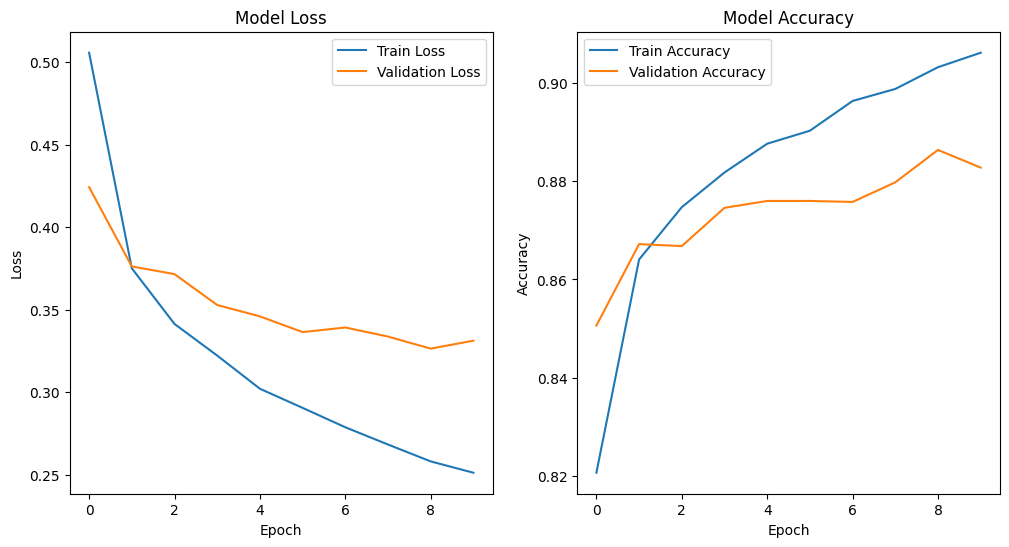

In [39]:
import matplotlib.pyplot as plt

# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4917 - accuracy: 0.8250 - val_loss: 0.4074 - val_accuracy: 0.8500
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3665 - accuracy: 0.8654 - val_loss: 0.3670 - val_accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3306 - accuracy: 0.8776 - val_loss: 0.3762 - val_accuracy: 0.8578
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3101 - accuracy: 0.8844 - val_loss: 0.3421 - val_accuracy: 0.8768
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2926 - accuracy: 0.8914 - val_loss: 0.3270 - val_accuracy: 0.8824
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2791 - accuracy: 0.8968 - val_loss: 0.3383 - val_accuracy: 0.8742
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9007 - val_loss: 0.3366 - val_accuracy:

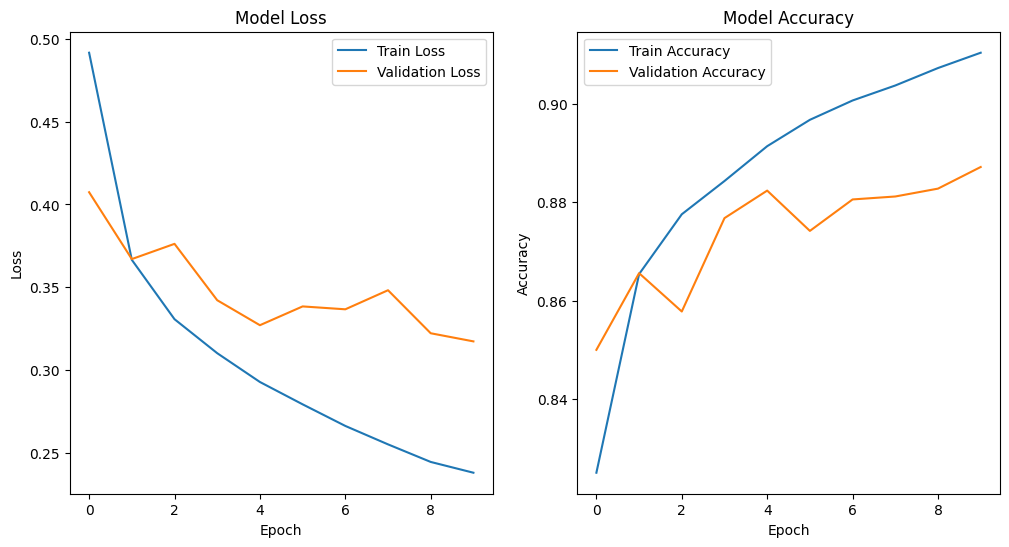

In [41]:
# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5151 - accuracy: 0.8165 - val_loss: 0.4514 - val_accuracy: 0.8372
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3818 - accuracy: 0.8611 - val_loss: 0.3871 - val_accuracy: 0.8504
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.8726 - val_loss: 0.3902 - val_accuracy: 0.8560
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3250 - accuracy: 0.8800 - val_loss: 0.3400 - val_accuracy: 0.8752
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3065 - accuracy: 0.8870 - val_loss: 0.3686 - val_accuracy: 0.8674
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8911 - val_loss: 0.3435 - val_accuracy: 0.8764
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.8954 - val_loss: 0.3337 - val_accuracy:

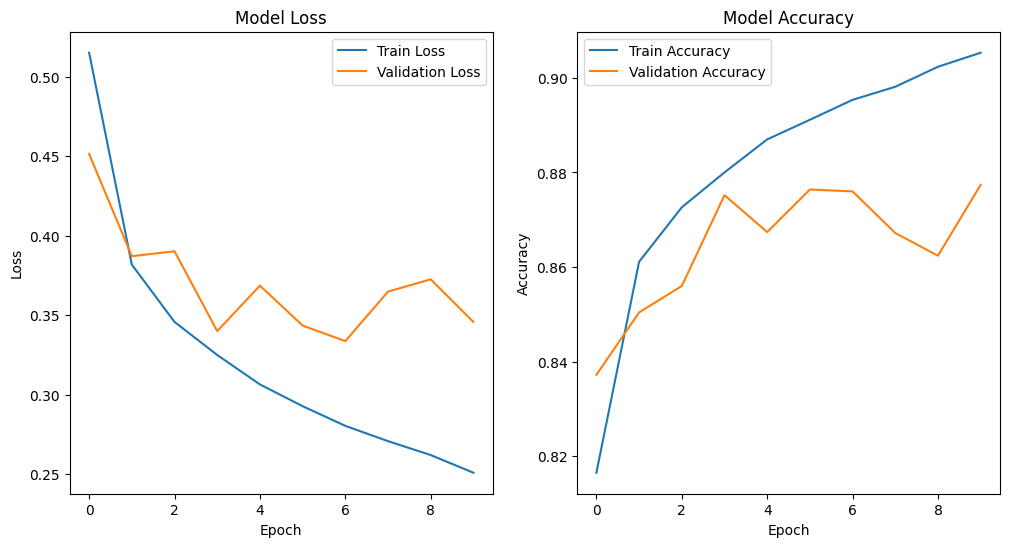

In [43]:
# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5196 - accuracy: 0.8119 - val_loss: 0.4223 - val_accuracy: 0.8486
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3791 - accuracy: 0.8617 - val_loss: 0.3874 - val_accuracy: 0.8628
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3434 - accuracy: 0.8736 - val_loss: 0.3714 - val_accuracy: 0.8672
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3199 - accuracy: 0.8821 - val_loss: 0.3685 - val_accuracy: 0.8642
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3047 - accuracy: 0.8855 - val_loss: 0.3701 - val_accuracy: 0.8626
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.8906 - val_loss: 0.3348 - val_accuracy: 0.8780
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2787 - accuracy: 0.8963 - val_loss: 0.3429 - val_accuracy

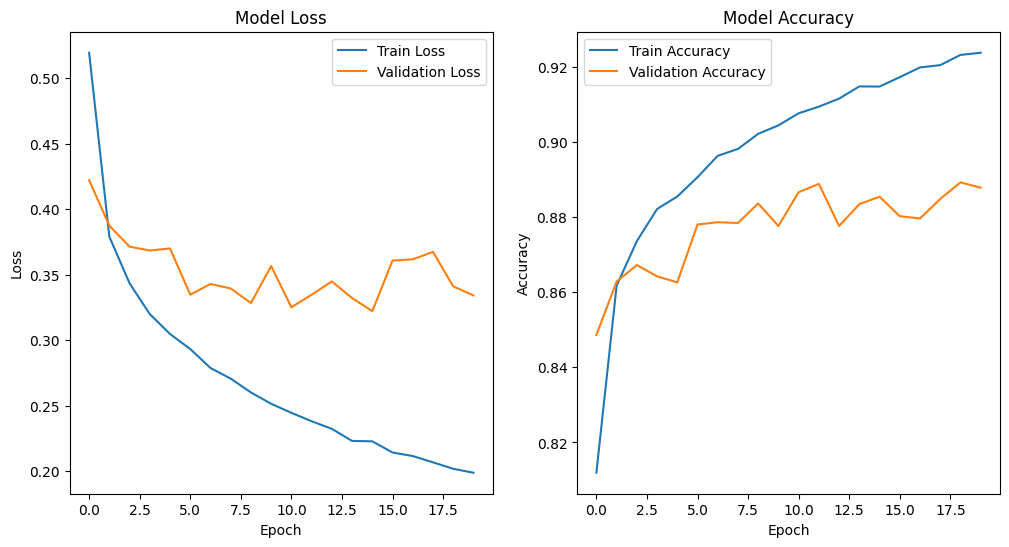

In [45]:
# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5629 - accuracy: 0.7993 - val_loss: 0.4757 - val_accuracy: 0.8300
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4098 - accuracy: 0.8541 - val_loss: 0.4030 - val_accuracy: 0.8590
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3717 - accuracy: 0.8652 - val_loss: 0.3936 - val_accuracy: 0.8600
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3510 - accuracy: 0.8708 - val_loss: 0.4020 - val_accuracy: 0.8574
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3375 - accuracy: 0.8772 - val_loss: 0.3855 - val_accuracy: 0.8636
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3246 - accuracy: 0.8806 - val_loss: 0.3663 - val_accuracy: 0.8714
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3144 - accuracy: 0.8853 - val_loss: 0.3802 - val_accuracy:

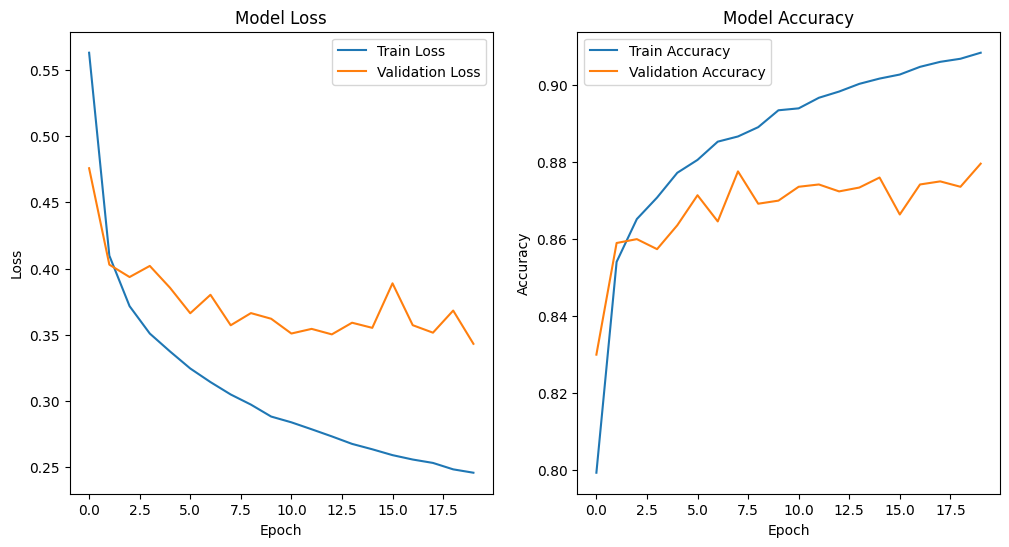

In [47]:
# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=1000,
                    validation_data=(val_images, val_labels))

Epoch 1/20
60/60 [==============================] - 3s 10ms/step - loss: 1.3044 - accuracy: 0.5582 - val_loss: 0.7552 - val_accuracy: 0.7510
Epoch 2/20
60/60 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.7999 - val_loss: 0.5467 - val_accuracy: 0.8058
Epoch 3/20
60/60 [==============================] - 0s 5ms/step - loss: 0.4901 - accuracy: 0.8263 - val_loss: 0.4867 - val_accuracy: 0.8298
Epoch 4/20
60/60 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.8415 - val_loss: 0.4645 - val_accuracy: 0.8370
Epoch 5/20
60/60 [==============================] - 0s 5ms/step - loss: 0.4360 - accuracy: 0.8467 - val_loss: 0.4457 - val_accuracy: 0.8434
Epoch 6/20
60/60 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.8558 - val_loss: 0.4266 - val_accuracy: 0.8544
Epoch 7/20
60/60 [==============================] - 0s 5ms/step - loss: 0.3992 - accuracy: 0.8607 - val_loss: 0.4227 - val_accuracy: 0.8500
Epoch 8/20
60/60 [=

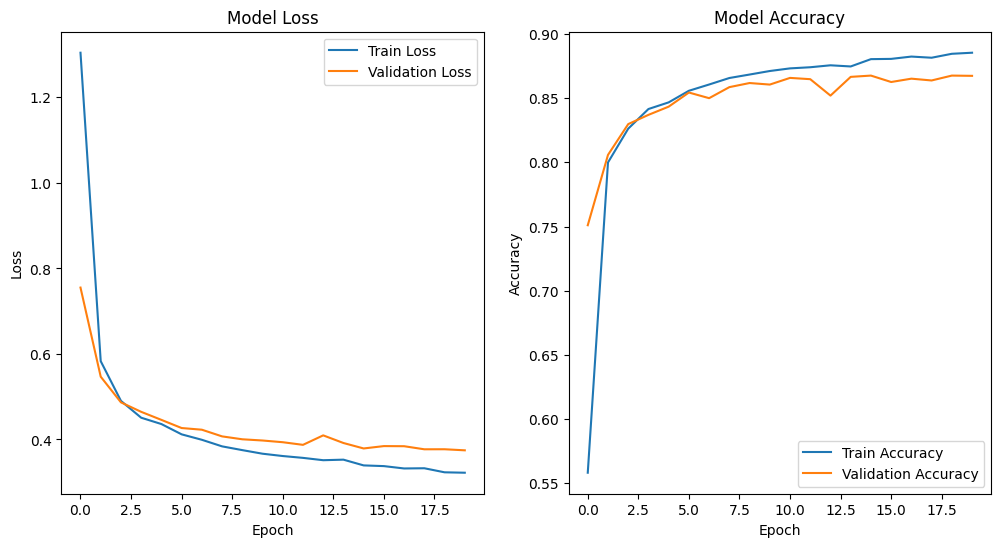

In [53]:
# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()